# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [169]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from utils.plotter import plot_confusion_matrix
from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from random import seed
from random import randrange

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

In [81]:
# (a) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
imgs_train = pd.read_csv(data_path, delimiter = ',')
imgs_train.drop(["imgId"], axis=1, inplace=True)
attributes = ["is_aeroplane","is_bicycle","is_bird","is_boat","is_bottle","is_bus","is_car","is_cat","is_chair","is_cow","is_diningtable","is_dog","is_horse","is_motorbike","is_pottedplant","is_sheep","is_sofa","is_tvmonitor"]
for attribute in attributes:
    imgs_train.drop([attribute], axis=1, inplace=True)
imgs_train.head(5)


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,...,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558,1
1,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,0.001953,...,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687,0
2,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,0.005208,...,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000,0
3,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,0.002232,...,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860,1
4,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,0.003397,...,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698,0


In [82]:
# (b) # Your Code goes here:
print('Number of images: {}, number of columns: {}'.format(imgs_train.shape[0], imgs_train.shape[1]))
# print(imgs_train.loc[:, 'is_cow':'is_tvmonitor'].describe())
print(imgs_train["is_person"].describe())
imgs_train.head(5)
imgs_train.info()

Number of images: 2093, number of columns: 501
count    2093.000000
mean        0.449116
std         0.497523
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_person, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 501 entries, dim1 to is_person
dtypes: float64(495), int64(6)
memory usage: 8.0 MB


(c) ***Your answer goes here:***
The dimensionality of the dataframe is 2093 by 501. The 2093 tells us how many images there are in the dataset, otherwise known as bag of words vectors. There are 500 feature words for the image, as well as 1 attribute class (is_person) labels for the images. Each value in each row in the first 500 columns represents the proportion of that feature column within the image. The proportions of each word sum up to 1 for each image. The mean of the is_person attribute is approximately 0.45, meaning nearly half of the images contain people

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

In [83]:
# (a) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
imgs_test = pd.read_csv(data_path, delimiter = ',')
imgs_test.drop(["imgId"], axis=1, inplace=True)
for attribute in attributes:
    imgs_test.drop([attribute], axis=1, inplace=True)
imgs_test.head(5)


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.001698,0.000000,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,0.004416,...,0.000000,0.002038,0.000340,0.003397,0.004416,0.000679,0.003736,0.005774,0.007812,1
1,0.002038,0.000000,0.004076,0.001019,0.001019,0.001019,0.000679,0.001019,0.001019,0.002378,...,0.000000,0.003736,0.003397,0.005435,0.002038,0.003397,0.001019,0.001359,0.002717,1
2,0.001116,0.000000,0.005208,0.001860,0.001116,0.000000,0.001488,0.002232,0.001116,0.000372,...,0.000000,0.014137,0.001116,0.004836,0.001488,0.000372,0.001116,0.001488,0.004092,1
3,0.001698,0.000340,0.004076,0.000679,0.002038,0.001019,0.002038,0.001019,0.000340,0.004076,...,0.000340,0.011889,0.001698,0.001698,0.002378,0.002378,0.002038,0.001698,0.001698,1
4,0.003736,0.001019,0.000679,0.001019,0.003736,0.002038,0.002038,0.001359,0.002717,0.001698,...,0.000679,0.000679,0.001359,0.001019,0.001019,0.001019,0.002378,0.001359,0.000000,1


In [71]:
# (b) # Your Code goes here:
print('\nTrain: Number of images: {}, number of columns: {}'.format(imgs_train.shape[0], imgs_train.shape[1]))
print('\nTest: Number of images: {}, number of columns: {}'.format(imgs_test.shape[0], imgs_test.shape[1]))
# print(imgs_train.loc[:, 'is_cow':'is_tvmonitor'].describe())
print("\nTrain: ", imgs_train["is_person"].describe())
print("\nTest: ", imgs_test["is_person"].describe())

print("\n",imgs_train.head(3))
print("\n",imgs_test.head(3))

print("\n",imgs_train.info())
print("\n",imgs_test.info())



Train: Number of images: 2093, number of columns: 501

Test: Number of images: 1113, number of columns: 501

Train:  count    2093.000000
mean        0.449116
std         0.497523
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_person, dtype: float64

Test:  count    1113.000000
mean        0.473495
std         0.499521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_person, dtype: float64

        dim1      dim2      dim3      dim4      dim5      dim6      dim7  \
0  0.002232  0.000558  0.002790  0.000837  0.001674  0.001953  0.001395   
1  0.001563  0.000391  0.007422  0.003516  0.003906  0.005078  0.001953   
2  0.000521  0.000000  0.000000  0.001042  0.001563  0.005729  0.000521   

       dim8      dim9     dim10    ...        dim492    dim493    dim494  \
0  0.002232  0.003627  0.006138    ...      0.000558  0.005301  0.001116   
1  0.002344  0.0019

(c) ***Your answer goes here:***
The testing dataset contains 1113 rows and 501 columns. In other words, it has data for 1113 unique images and presents 500 features for each image, with one binary attribute column, is_person. The mean and std of the is_person attributes are comparable for both the testing and training datasets. There do not appear to be any discrepancies.

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

In [84]:
# (a) # Your Code goes here:
X_tr = imgs_train.drop(["is_person"], axis=1)
X_tst = imgs_test.drop(["is_person"], axis=1)
y_tr = imgs_train["is_person"]
y_tst = imgs_test["is_person"]
print(y_tr.shape)

(2093,)


Text(0.5,1,'Testing Set')

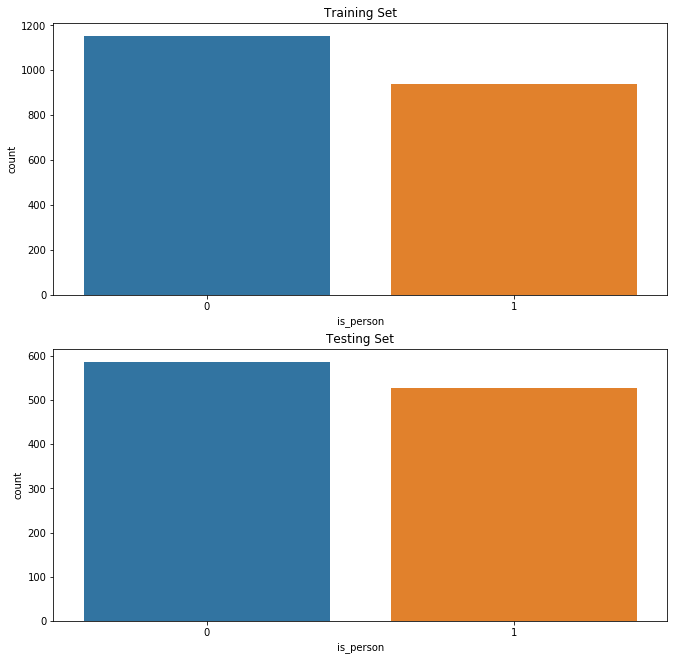

In [85]:
# (b) # Your Code goes here:
fig, ax = plt.subplots(2, 1, figsize=(11,11))
sns.countplot(ax=ax[0], x=y_tr)
ax[0].set_title("Training Set")
sns.countplot(ax=ax[1], x=y_tst)
ax[1].set_title("Testing Set")

(c) ***Your answer goes here:***
 [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?
 
I do not envision any problems given the distribution under both sets. There is a slight discrepancy between the training and testing dataset predictions, where the testing dataset shows a slightly higher classification with the positive is_person attribute. Classification accuracy measures the number of correct predictions made divided by the total number of predictions. In this case, if a dummy model were to simply predict all images to contain a person, it would have less than 50% prediction accuracy. Similarly, if it were to predict all images to contain a person, it would have just over 50% prediction accuracy, which is also fairly bad. Overall, classification accuracy would be a good metric for evaluating the performance of the classifiers because the class is relatively balanced between positive and negative outcomes.

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

(a) ***Your answer goes here:***
Given that there are two possible outcomes for the binary class "is_person", both of which are roughly equally likely, a valid baseline predictor would be a random classification algorithm predicting the is_person class to be either 0 or 1. This algorithm will likely never have a prediction probability of over 50%, due to one classification having a greater frequency than the other. This model will serve as our baseline for future classifications. Because of its randomness, the baseline should always have a lower classification accuracy than any properly trained model.

In [87]:
# (b) # Your Code goes here:

def baseline_algorithm(y_test):
    y_test = y_test.values
    y_test = y_test.reshape(len(y_test), 1)
    output_values = [row[-1] for row in y_test]
    unique = list(set(output_values))
    predicted = list()
    for row in y_test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted

predictions = baseline_algorithm(y_tst)

acc = accuracy_score(predictions, y_tst)
print("Classification Accuracy: ", acc)

Classification Accuracy:  0.48966756513926324


### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

In [88]:
# (a) # Your Code goes here:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)

print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_tst, y_tst)))

Classification accuracy on test set: 0.527


(b) ***Your answer goes here:***
The classification performance of the Logistic Regression model is slightly greater than the baseline model. This is not good, since the baseline model is not intuitive, and simply predicts classifications randomly. If the classifier can't do much better than random choice, it tells us that the data is either not correlated or we have to edit our model. 

Likelihoods for fisrt 10 instances: 
 [[0.53094777 0.46905223]
 [0.55006925 0.44993075]
 [0.54626155 0.45373845]
 [0.5509606  0.4490394 ]
 [0.54120522 0.45879478]
 [0.53272758 0.46727242]
 [0.55305094 0.44694906]
 [0.54287347 0.45712653]
 [0.5272001  0.4727999 ]
 [0.5495708  0.4504292 ]]


              precision    recall  f1-score   support

          0       0.53      1.00      0.69       586
          1       0.00      0.00      0.00       527

avg / total       0.28      0.53      0.36      1113



/home/Evan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(33,0.5,'is_person True Label')

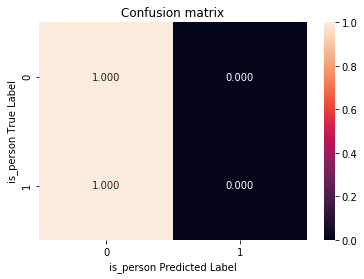

In [89]:
# (c) # Your Code goes here:
y_pred = lr.predict(X_tst)
y_prob_pred = lr.predict_proba(X_tst)
print("Likelihoods for fisrt 10 instances: \n", y_prob_pred[0:10])
cm = confusion_matrix(y_tst, y_pred)
plot_confusion_matrix(cm=cm)
print("\n\n", classification_report(y_tst, y_pred))
plt.xlabel('is_person Predicted Label')
plt.ylabel('is_person True Label')

(d) ***Your answer goes here:***
Here, we see our Logistic Regression function working in a non-intuitive way, predicting all instances to belong to class 0. If we take a look at the prediction probabilities for each instance, we see that the probability it belongs to class 0 is greater for all instances. This means that all instances with this probability will be predicted into class "0". When the Logistic Regression model is trained, each variable entered into the model is given a "P" value which determines whether or not that variable's presence significantly contributes to the likelihood that an instance as a whole belongs to a certain class. In this case, with so many feature variables and not a substantially large amount of training instances, the model will tailor its parameter values to small idiosyncrasies in the data. This causes the logistic regression model to have bias and ultimately overfit the training resulting in these faulty predictions.

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

(a) ***Your answer goes here:***
Any standardization parameters calculated from preprocessing the training data should also be used to preprocess the testing set. The reason for this is because we want to apply our model on "unseen" data, which is not available at the time of the model being built. By restricting the calculation of standardization parameters to the training set, we are preventing the model from gaining information on the testing/validation set and hence maintaining the validity of the estimate of our model quality.

In [90]:
# (b) # Your Code goes here:
scaler = StandardScaler()

#fit on training set only
scaler.fit(X_tr)

#apply transform to both training and test set
X_tr_scale = scaler.transform(X_tr)
X_tst_scale = scaler.transform(X_tst)

print(X_tr_scale[0:5])
print(X_tr.values[0:5])

[[ 0.4036037  -0.14076645 -0.4135209  ... -0.15512767 -0.40608637
  -0.8753979 ]
 [-0.15725699 -0.25954013  0.84089569 ... -1.53238482  0.32063313
   0.61849034]
 [-1.03082475 -0.53762702 -1.16909566 ... -1.16497521  0.581571
  -1.07728446]
 [ 1.02734115  1.04981528  0.03982396 ... -0.22071134 -1.24449328
  -0.40432924]
 [-0.32828177 -0.29581233 -0.80105763 ...  1.10224536 -0.90442261
  -0.46294147]]
[[0.002232 0.000558 0.00279  ... 0.001953 0.001674 0.000558]
 [0.001563 0.000391 0.007422 ... 0.       0.003125 0.004687]
 [0.000521 0.       0.       ... 0.000521 0.003646 0.      ]
 [0.002976 0.002232 0.004464 ... 0.00186  0.       0.00186 ]
 [0.001359 0.00034  0.001359 ... 0.003736 0.000679 0.001698]]


Likelihoods for each instance: 
 [[0.35462211 0.64537789]
 [0.78503959 0.21496041]
 [0.24918456 0.75081544]
 ...
 [0.98547987 0.01452013]
 [0.05951371 0.94048629]
 [0.67254388 0.32745612]]
Classification accuracy on test set: 0.643


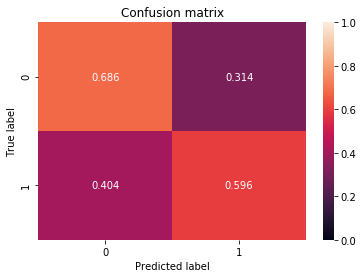

In [183]:
# (c) # Your Code goes here:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_scale, y_tr)
y_prob_pred = lr.predict_proba(X_tst_scale)
print("Likelihoods for each instance: \n", y_prob_pred)
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_tst_scale, y_tst)))
y_pred = lr.predict(X_tst_scale)
cm = confusion_matrix(y_tst, y_pred)
plot_confusion_matrix(cm=cm)
# print(classification_report(y_tst, y_pred))

(d) ***Your answer goes here:***
The performance of this model is significantly higher than the previous one which did not use preprocessed data. The classification accuracy found here was 0.642 instead of 0.527. While this is still not great classification accuracy, we can see that it is handling the data in a much more intelligible way than in the previous model. By preprocessing the data, we standardize the distribution of the weights of the features around a mean of 0 and a standard deviation of 1. This makes it easier for the logistic regression model to measure the distance between feature weights due to the increased variance and better understand the overall impact(P) of each feature on the classification. Hence, we see a much more intelligent classification algorithm that actually takes into account the importance of each independent variable on the whole of the regression model.

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier on the entire training set and report the classification accuracy on the test set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

(a) ***Your answer goes here:***
Since we are fitting our model using the training set, it wouldn't make sense to use the test-set to evaluate hyper-parameter performance. We want the testing set to remain unseen to our model during training and hyper-parameter optimization, hence we will not use it for this stage. The testing set is reserved for comparing different models in an unbiased way, by formulating comparisons from data that was not used during hyper-parameter selection.

In [92]:
# (b) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
imgsb_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
imgsb_test = pd.read_csv(data_path, delimiter = ',')

imgsb_train.drop(["imgId"], axis=1, inplace=True)
imgsb_test.drop(["imgId"], axis=1, inplace=True)

attributes = ["is_aeroplane","is_bicycle","is_bird","is_boat","is_bottle","is_bus","is_car","is_cat","is_chair","is_cow","is_diningtable","is_dog","is_horse","is_motorbike","is_pottedplant","is_sheep","is_sofa","is_tvmonitor"]
for attribute in attributes:
    imgsb_train.drop([attribute], axis=1, inplace=True)
    imgsb_test.drop([attribute], axis=1, inplace=True)

X_train = imgsb_train.drop(columns=["is_person"], axis=1)
y_train = imgsb_train["is_person"]

X_test = imgsb_test.drop(columns=["is_person"], axis=1)
y_test = imgsb_test["is_person"]
    
imgs_train.head(5)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,...,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558,1
1,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,0.001953,...,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687,0
2,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,0.005208,...,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000,0
3,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,0.002232,...,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860,1
4,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,0.003397,...,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698,0


In [93]:
# (c) # Your Code goes here:
# [Code] Using Cross-Validation on the Training set 
# (a 5-fold split should be sufficient: set shuffle=True and random_state=0), 
# perform a search for the best value of C in the range 1e-5 to 1e5 (Hint: the KFold split method will come in handy). 
# Keep track of the validation-set accuracy per-fold for each value of C in an array. 
# Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# x = [1,2,3,4]

# X_train.loc[x]



C = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]


total_scores = []
for c in C:
    lr = LogisticRegression(solver='lbfgs', C=c)
    lr.fit(X_train, y_train)        

    scores = cross_val_score(lr, X_train, y_train, cv=kf.split(X_train))     
    total_scores.append(scores)

total_scores
#total_scores is an multi-dimensional array containing the accuracy scores for each fold in the kfold cross validation
#each row contains the 

[array([0.56563246, 0.61336516, 0.54653938, 0.52870813, 0.55980861]),
 array([0.66825776, 0.6849642 , 0.70405728, 0.6507177 , 0.63636364]),
 array([0.67303103, 0.74224344, 0.73031026, 0.6937799 , 0.65789474]),
 array([0.66825776, 0.71360382, 0.69451074, 0.69617225, 0.66985646]),
 array([0.65871122, 0.65871122, 0.65155131, 0.68181818, 0.65550239]),
 array([0.64200477, 0.64200477, 0.6300716 , 0.6722488 , 0.64832536]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.6507177 ]),
 array([0.64439141, 0.63484487, 0.61813842, 0.66267943, 0.64593301]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.64832536]),
 array([0.64439141, 0.6372315 , 0.62052506, 0.66267943, 0.64832536]),
 array([0.64439141, 0.6372315 , 0.61813842, 0.66267943, 0.6507177 ])]

Best regularization parameter:  0.001
Best regularization accuracy:  0.6994518733370636


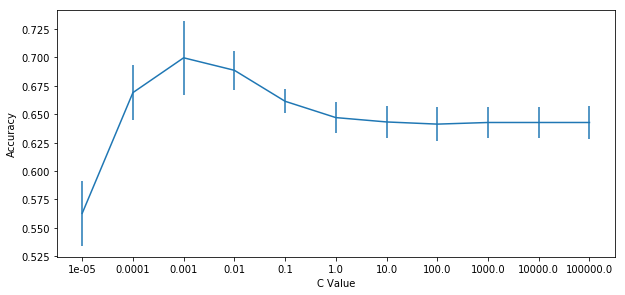

In [95]:
# (d) # Your Code goes here:
# Plot the mean and standard-deviation (across folds) of the accuracy as a function of C. 
# Hint: you may find the matplotlib's errorbar function useful. Be careful to use the correct scale on the x-axis. 
# Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): N.B. 
# Do not pick the optimal value "by hand", instead use an appropriate numpy function.

import math

total_scores = np.array(total_scores)

accuracy_means = []
accuracy_std = []

for i in range(11):
    mean = np.mean(total_scores[i])
    std = np.std(total_scores[i])
    accuracy_means.append(mean)
    accuracy_std.append(std)


accuracy_means = np.array(accuracy_means)
C = np.array(C)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)

x = [math.log(c,10) for c in C]

plt.errorbar(x, accuracy_means, yerr=accuracy_std, xlolims=True)



ax1.xaxis.set_ticks(x)
ax1.xaxis.set_ticklabels(C)
# plt.xticks(x)
# plt.xticklabels(x)

# plt.xlim(1e-5, 0)
plt.xlabel("C Value")
plt.ylabel("Accuracy")

C.shape
accuracy_means

index = np.argmax(accuracy_means) #gets the index of the maximum mean accuracy for the respective regularization parameter value
print("Best regularization parameter: ", C[index])
print("Best regularization accuracy: ", accuracy_means[index])

(e) ***Your answer goes here:***
 Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).
 
The optimized regularization parameter(C) is 0.001, which tells us that our model benefits by applying a penalty to parameter values. Our previous model attempted to construct a hyperplane that optimized the number of training points classified correctly. However, due to the large number of independent variables and lack of test instances, our previous model overfit the training set, causing it to underperform on the testing set. In this case, since we are using cross validation, we are able to optimize our hyperparameter using only the training set while avoiding overfitting. This low optimum C value tells us that our model will benefit from regularization. In other words, we can improve our model's classification accuracy on future data by reducing the likelihood that the model will be influenced by idiosyncrasies in the training set.

In [184]:
# (f) # Your Code goes here:
lr = LogisticRegression(solver="lbfgs", C=0.001)
lr.fit(X_train, y_train)

print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_test, y_test)))

Classification accuracy on test set: 0.699


### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

In [17]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

In [18]:
# (d) # Your Code goes here:

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.


 linear
SVC classification accuracy on training set: 0.616

 rbf
SVC classification accuracy on training set: 0.628

 polynomial
SVC classification accuracy on training set: 0.577


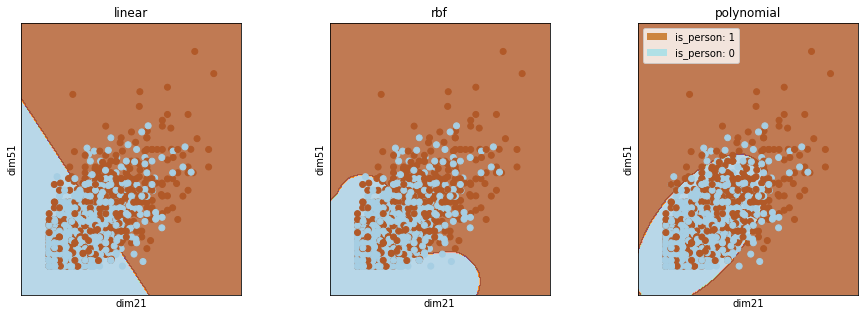

In [202]:
# (a) # Your Code goes here:
from sklearn import svm, datasets
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

X = X_train[["dim21", "dim51"]]
labels = ["dim21", "dim51"]
titles = ["linear", "rbf", "polynomial"]

models = (svm.SVC(kernel='linear', C=1), svm.SVC(kernel='rbf', gamma='auto', C=1), svm.SVC(kernel='poly', degree=2, C=1))
for clf in models:
    clf.fit(X, y_train)    

plot_SVM_DecisionBoundary(models, X.values, y_train.values, titles, labels)


labels = ["is_person: 1", "is_person: 0"]
custom_markers = [Patch(facecolor='Peru'),
                  Patch(facecolor='powderblue')]
plt.legend(custom_markers, labels)



for model, title in zip(models, titles):
    print('\n', title)
    print('SVC classification accuracy on training set: {:.3f}'.format(model.score(X, y_train)))


(b) ***Your answer goes here:***
Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

For the linear kernel, the decision boundary is linear, as it should be. The linear support vector will attempt to maximize the separation of the hyperplane from nearby training points while minimizing the number of misclassified points. Since the data points are non-separable, our model will penalize data points on the wrong side of the linear hyperplane, and attempt to minimize these penalties and maximize the classification accuracy. Based on this classifier, the positive(is_person=1) classification points are more heavily clustered at higher values for dim21 and dim51, while the negative classification points tends to contain lower values for dim21 and dim51. Due to the lack of linear separability of the data, the linear SVM does not do the best job in classifying the data points. 

For the radial basis kernel, the decision boundary appears to have a gaussian shape, with two circular boundaries clearly visible. This kernel works by transforming the data points into a new dimensional space giving us greater linear separability between the classes. This is evident in the kernel has a greater classification accuracy, telling us that there may be some radial correlation between the datapoints. 

For the polynomial kernel, we see the decision boundary takes an ovular, 2nd degree polynomial shape. The polynomial kernel works in a similar way to the RBF one, in that it transforms the data points into a higher dimensional space that is more linearly separable. The polynomial kernel gives us an indirect way of specifying distances between data points. In this case, it does not seem like the polynomial shape fits the data too well, so there is no apparent polynomial relation across the dataset.

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

In [162]:
# (a) # Your Code goes here:
from numpy import unravel_index
C = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
degree = [1, 2, 3, 4, 5]

#kf is K-fold iterator object

# svm.SVC(kernel='poly', degree=2, C=1)

# total_scores = np.zeros((5,6)) 
# total_scores = total_scores.tolist() # degree x C

# column=0

# for c in C:
#     for d in degree:
#         model = svm.SVC(kernel='poly', degree=d, C=c)
#         model.fit(X_train, y_train)        

#         scores = cross_val_score(model, X_train, y_train, cv=kf.split(X_train))  
#         print((d-1), ", ", column, ", ")
#         total_scores[d-1][column] = (np.mean(scores))
#     column+=1

# total_scores

print(X.idxmax())
X.iloc[:,0][438]
y_train.iloc[438]

dim21    438
dim51    161
dtype: int64


1

Optimized Hyperparameters
C:  1 
degree:  1


(5, 6)

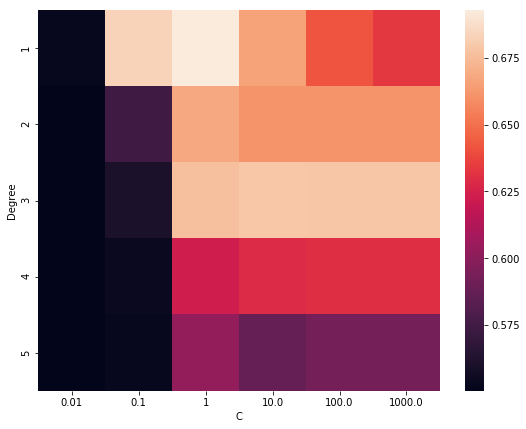

In [46]:
# (b) # Your Code goes here:
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.heatmap(total_scores)
ax.set_yticklabels(degree)
ax.set_xticklabels(C)
plt.xlabel('C')
plt.ylabel('Degree')

total_scores = np.array(total_scores)

optimum_indices = unravel_index(total_scores.argmax(), total_scores.shape)
C_best, d_best = C[optimum_indices[1]], degree[optimum_indices[0]]
print("Optimized Hyperparameters\nC: ", C_best, "\ndegree: ", d_best)


In [200]:
# (c) # Your Code goes here:
best_model = svm.SVC(kernel='poly', degree=1, C=1)
best_model.fit(X_train, y_train)
print('Classification accuracy on test set: {:.3f}'.format(best_model.score(X_test, y_test)))

Classification accuracy on test set: 0.689


(d) ***Your answer goes here:***
Explain the results relative to the Logistic Classifier.

Here we see the logistic classifier and polynomial SVM have a similar classification accuracy. Interestingly, the optimum polynomial support vector model has a degree of 1, meaning its hyperplane will be similar to that of the logistic regression model. Due to this fact, it is not suprising that the two models would have similar classification accuracies.

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

(b) ***Your answer goes here:***

(c) ***Your answer goes here:***

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)